In [2]:
print("Sid")

Sid


In [36]:
!pip install numpy
!pip install matplotlib

# Develop LSTM Models for Univariate Time Series Forecasting

In [14]:
# Univariate lstm example
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [15]:
# Preparing independent and dependent features 
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps 
n_steps = 3 
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [17]:
print(X), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [18]:
X.shape

(6, 3)

In [19]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Building LSTM Model

In [20]:
# define model 
model = Sequential()
# return_sequence = to access the hidden state output for each input time step
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
# fit model
model.fit(X, y, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 7s 7s/step - loss: 32707.6816
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 32089.3730
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 31533.5098
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 31015.2891
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 30511.6641
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 30002.3984
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 29471.1973
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 28898.9434
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 28247.7090
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 27400.3027
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 26387.4707
Epoch 12/300
1/1 [==============================] - 0s 9ms/step - loss: 25332.0840
Epoch 13/300


1/1 [==============================] - 0s 9ms/step - loss: 21.5002
Epoch 102/300
1/1 [==============================] - 0s 6ms/step - loss: 21.1158
Epoch 103/300
1/1 [==============================] - 0s 7ms/step - loss: 20.8139
Epoch 104/300
1/1 [==============================] - 0s 7ms/step - loss: 20.5736
Epoch 105/300
1/1 [==============================] - 0s 7ms/step - loss: 20.3626
Epoch 106/300
1/1 [==============================] - 0s 5ms/step - loss: 20.1859
Epoch 107/300
1/1 [==============================] - 0s 9ms/step - loss: 20.1079
Epoch 108/300
1/1 [==============================] - 0s 5ms/step - loss: 20.0949
Epoch 109/300
1/1 [==============================] - 0s 7ms/step - loss: 20.0505
Epoch 110/300
1/1 [==============================] - 0s 8ms/step - loss: 19.9764
Epoch 111/300
1/1 [==============================] - 0s 7ms/step - loss: 19.9199
Epoch 112/300
1/1 [==============================] - 0s 8ms/step - loss: 19.8960
Epoch 113/300
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 3.5100
Epoch 203/300
1/1 [==============================] - 0s 9ms/step - loss: 3.4706
Epoch 204/300
1/1 [==============================] - 0s 8ms/step - loss: 3.4374
Epoch 205/300
1/1 [==============================] - 0s 5ms/step - loss: 3.3653
Epoch 206/300
1/1 [==============================] - 0s 7ms/step - loss: 3.4483
Epoch 207/300
1/1 [==============================] - 0s 7ms/step - loss: 4.0203
Epoch 208/300
1/1 [==============================] - 0s 8ms/step - loss: 4.4623
Epoch 209/300
1/1 [==============================] - 0s 5ms/step - loss: 3.4136
Epoch 210/300
1/1 [==============================] - 0s 8ms/step - loss: 4.6680
Epoch 211/300
1/1 [==============================] - 0s 5ms/step - loss: 3.1594
Epoch 212/300
1/1 [==============================] - 0s 8ms/step - loss: 4.1605
Epoch 213/300
1/1 [==============================] - 0s 5ms/step - loss: 3.0530
Epoch 214/300
1/1 [==============================] - 0

## Predicting For the next 10 data 

In [21]:
# demonstrate prediction for the next 10 days 
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1
              
print(lst_output)

[222.33249]
[196.         210.         222.33248901]
1 day output [[232.94424]]
[210.         222.33248901 232.94424438]
2 day output [[245.8257]]
[222.33249 232.94424 245.8257 ]
3 day output [[257.80872]]
[232.94424 245.8257  257.80872]
4 day output [[269.46002]]
[245.8257  257.80872 269.46002]
5 day output [[282.18228]]
[257.80872 269.46002 282.18228]
6 day output [[294.54852]]
[269.46002 282.18228 294.54852]
7 day output [[307.06027]]
[282.18228 294.54852 307.06027]
8 day output [[320.1498]]
[294.54852 307.06027 320.1498 ]
9 day output [[333.2168]]
[222.33249, 232.94424, 245.8257, 257.80872, 269.46002, 282.18228, 294.54852, 307.06027, 320.1498, 333.2168]


In [22]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [23]:
len(timeseries_data)

9

In [24]:
lst_output

[222.33249,
 232.94424,
 245.8257,
 257.80872,
 269.46002,
 282.18228,
 294.54852,
 307.06027,
 320.1498,
 333.2168]

### Visualizing The Output

In [25]:
import matplotlib.pyplot as plt

In [26]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

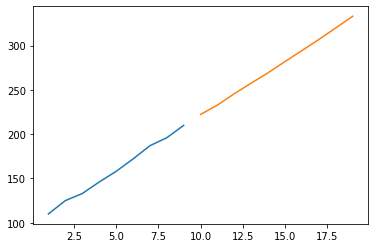

In [27]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)